In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("Downloads\marketing_data (1).csv")


In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
df.corr().T

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
ID,1.000000,0.000028,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,...,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,-0.021968,0.033883
Year_Birth,0.000028,1.000000,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,0.021325,-0.030128
Kidhome,0.002406,0.230176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,-0.080008,0.040207
Teenhome,-0.002580,-0.352111,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,-0.154446,0.003138
Recency,-0.046524,-0.019871,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,-0.198437,0.013231
MntWines,-0.022878,-0.157773,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,0.247254,-0.039007
MntFruits,0.004600,-0.017917,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,0.125289,-0.005166
MntMeatProducts,-0.004437,-0.030872,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,0.236335,-0.023483
MntFishProducts,-0.024475,-0.041625,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,0.111331,-0.020953
MntSweetProducts,-0.007642,-0.018133,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,0.490924,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,0.117372,-0.022485


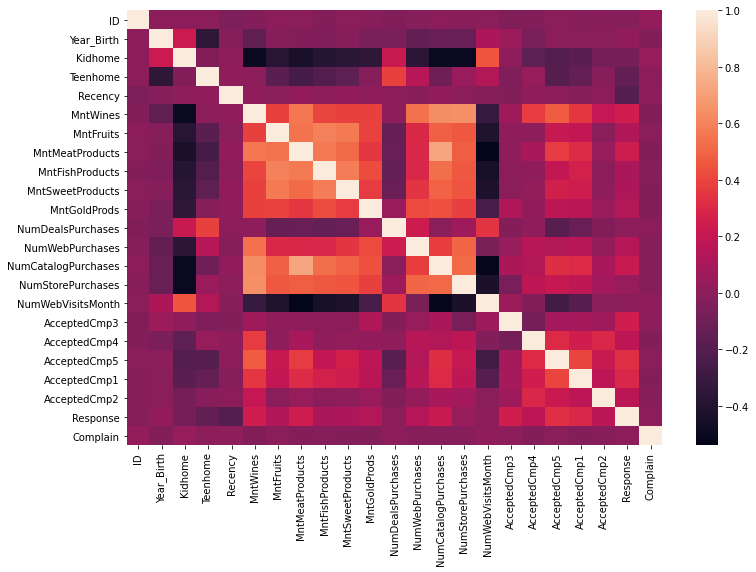

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.show()

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [12]:
df[' Income ']=df[' Income '].str.replace('$','')

In [13]:
df[' Income ']=df[' Income '].str.replace(',','').astype(float)

In [14]:
#filling null values with mean 

In [15]:
df[' Income '].fillna(df[' Income '].mean(),axis=0,inplace=True)

In [16]:
df.rename({' Income ':'income'},axis=1,inplace=True)

# Exploratory data analysis

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


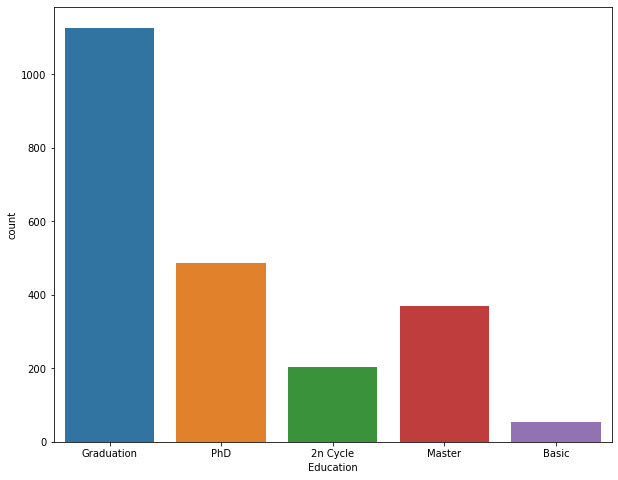

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(df.Education)
plt.show()

In [18]:
df.Education.value_counts()/df.value_counts().sum()*100

Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64

In [19]:
df.Marital_Status.value_counts()/df.value_counts().sum()*100

Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
YOLO         0.089286
Absurd       0.089286
Name: Marital_Status, dtype: float64

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


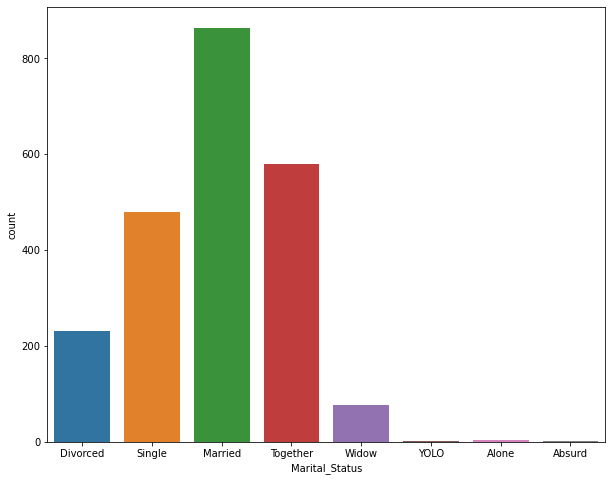

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(df.Marital_Status)
plt.show()

In [21]:
df[(df['Marital_Status']=='Married')&(df['income']>df.income.mean())]

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
8,4047,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND
10,2079,1947,2n Cycle,Married,81044.0,0,0,12/27/13,0,450,...,10,1,0,0,0,0,0,0,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,8475,1973,PhD,Married,157243.0,0,1,3/1/14,98,20,...,0,0,0,0,0,0,0,0,0,IND
2205,8070,1973,PhD,Married,54222.0,0,1,3/1/14,98,199,...,5,3,0,0,0,0,0,0,0,SP
2215,9645,1968,Graduation,Married,64590.0,0,0,10/14/12,98,920,...,10,6,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


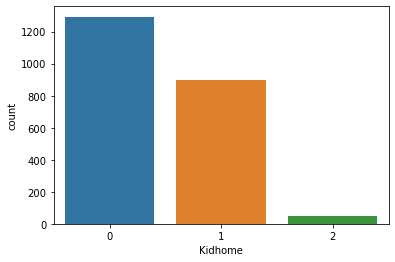

In [22]:
sns.countplot(df.Kidhome)
plt.show()

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


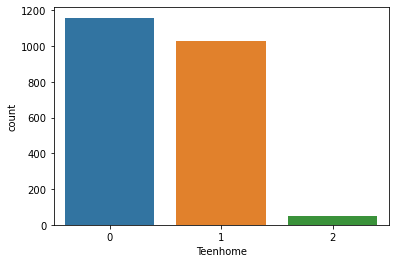

In [23]:
sns.countplot(df.Teenhome)
plt.show()

In [24]:
df.drop(['ID','Dt_Customer'],axis=1,inplace=True)

In [25]:
df.shape

(2240, 26)

In [26]:
df['age']=2021-df['Year_Birth']

In [27]:
df.drop('Year_Birth',axis=1,inplace=True)

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


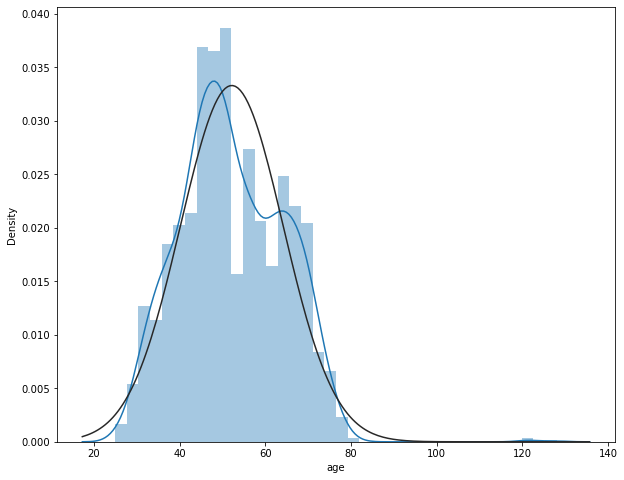

In [28]:
from scipy.stats import norm
plt.figure(figsize=(10,8))
sns.distplot(df.age,fit=norm)
plt.show()

In [29]:
df.age.mean()

52.19419642857143

In [30]:
df.columns

Index(['Education', 'Marital_Status', 'income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'age'],
      dtype='object')

In [31]:
wines=df.MntWines.sum()
fruits=df.MntFruits.sum()
meat=df.MntMeatProducts.sum()
fish=df.MntFishProducts.sum()
sweets=df.MntSweetProducts.sum()
gold=df.MntGoldProds.sum()

In [32]:
print('Total sales :','\n',wines,fruits,meat,fish,sweets,gold)

Total sales : 
 680816 58917 373968 84057 60621 98609


In [33]:
outliers=df.select_dtypes(exclude=object)
for i in outliers:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    print('upperbound:',i,ub)
    print('number of outliers:',i,'=',(df.shape[0]-df[(df[i]>lb)&(df[i]<ub)].shape[0]))

upperbound: income 117416.25
number of outliers: income = 8
upperbound: Kidhome 2.5
number of outliers: Kidhome = 0
upperbound: Teenhome 2.5
number of outliers: Teenhome = 0
upperbound: Recency 149.0
number of outliers: Recency = 0
upperbound: MntWines 1225.0
number of outliers: MntWines = 35
upperbound: MntFruits 81.0
number of outliers: MntFruits = 233
upperbound: MntMeatProducts 556.0
number of outliers: MntMeatProducts = 175
upperbound: MntFishProducts 120.5
number of outliers: MntFishProducts = 223
upperbound: MntSweetProducts 81.0
number of outliers: MntSweetProducts = 250
upperbound: MntGoldProds 126.5
number of outliers: MntGoldProds = 207
upperbound: NumDealsPurchases 6.0
number of outliers: NumDealsPurchases = 147
upperbound: NumWebPurchases 12.0
number of outliers: NumWebPurchases = 4
upperbound: NumCatalogPurchases 10.0
number of outliers: NumCatalogPurchases = 71
upperbound: NumStorePurchases 15.5
number of outliers: NumStorePurchases = 0
upperbound: NumWebVisitsMonth 13.0

In [34]:
df.columns

Index(['Education', 'Marital_Status', 'income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'age'],
      dtype='object')

In [35]:
df[df['income']>117416.25]

,Education,Marital_Status,income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age
325,Graduation,Together,157146.0,0,0,13,1,0,1725,2,...,1,0,0,0,0,0,0,0,SA,44
497,PhD,Married,160803.0,0,0,21,55,16,1622,17,...,0,0,0,0,0,0,0,0,US,39
527,Graduation,Together,666666.0,1,0,23,9,14,18,8,...,6,0,0,0,0,0,0,0,SA,44
731,PhD,Together,162397.0,1,1,31,85,1,16,2,...,1,0,0,0,0,0,0,0,SP,45
853,Master,Together,157733.0,1,0,37,39,1,9,2,...,1,0,0,0,0,0,0,0,SP,50
1826,Graduation,Divorced,153924.0,0,0,81,1,1,1,1,...,0,0,0,0,0,0,0,0,SP,46
1925,PhD,Married,156924.0,0,0,85,2,1,2,1,...,0,0,0,0,0,0,0,0,CA,72
2204,PhD,Married,157243.0,0,1,98,20,2,1582,1,...,0,0,0,0,0,0,0,0,IND,48


C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


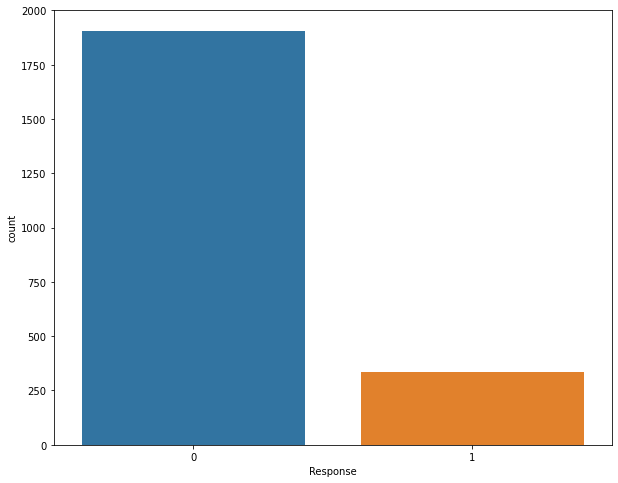

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


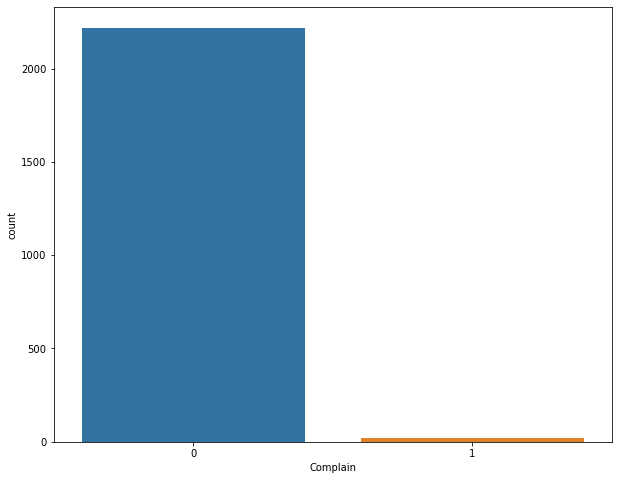

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


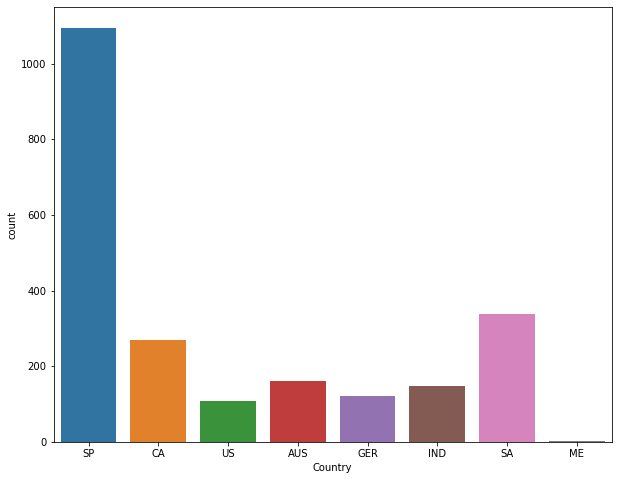

In [36]:
for x in df.iloc[:,22:25]:
    plt.figure(figsize=(10,8))
    sns.countplot(df[x])
    plt.show()


In [37]:
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [38]:
df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [39]:
df.drop('Complain',axis=1,inplace=True)

In [40]:
encoder=LabelEncoder()

In [41]:
for columns in df.select_dtypes(include=object).columns:
    df[columns]=encoder.fit_transform(df[columns])

In [42]:
x=df.drop('Response',axis=1)

In [43]:
y=df['Response']
y

0       1
1       1
2       0
3       0
4       1
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [45]:
x_train.shape

(1568, 24)

In [46]:
df.Education.unique()

array([2, 4, 0, 3, 1])

In [47]:
df[df['Education']=='2n Cycle']

,Education,Marital_Status,income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,age


In [48]:
df

,Education,Marital_Status,income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,age
0,2,2,84835.0,0,0,0,189,104,379,111,...,6,1,0,0,0,0,0,1,6,51
1,2,4,57091.0,0,0,0,464,5,64,7,...,7,5,0,0,0,0,1,1,1,60
2,2,3,67267.0,0,1,0,134,11,59,15,...,5,2,0,0,0,0,0,0,7,63
3,2,5,32474.0,1,1,0,10,0,1,0,...,2,7,0,0,0,0,0,0,0,54
4,2,4,21474.0,1,0,0,6,16,24,11,...,2,7,1,0,0,0,0,1,6,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4,2,66476.0,0,1,99,372,18,126,47,...,11,4,0,0,0,0,0,0,7,45
2236,0,3,31056.0,1,0,99,5,10,13,3,...,3,8,0,0,0,0,0,0,6,44
2237,2,2,46310.0,1,0,99,185,2,88,15,...,5,8,0,0,0,0,0,0,6,45
2238,2,3,65819.0,0,0,99,267,38,701,149,...,10,3,0,0,0,0,0,0,3,43


In [49]:
log=linear_model.LogisticRegression(solver='liblinear',max_iter=300,random_state=5)
log.fit(x_train,y_train)

LogisticRegression(max_iter=300, random_state=5, solver='liblinear')

In [50]:
log.score(x_test,y_test)

0.8630952380952381

In [51]:
log.score(x_train,y_train)

0.8526785714285714

In [52]:
y_hat=log.predict(x_test)

In [53]:
cm=metrics.confusion_matrix(y_test,y_hat)
cm

array([[562,   6],
       [ 86,  18]], dtype=int64)

<AxesSubplot:>

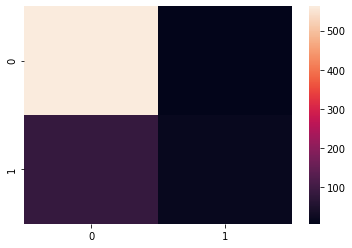

In [54]:
sns.heatmap(cm)

In [55]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       568
           1       0.75      0.17      0.28       104

    accuracy                           0.86       672
   macro avg       0.81      0.58      0.60       672
weighted avg       0.85      0.86      0.82       672



In [56]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [57]:
dt.score(x_test,y_test)

0.8407738095238095

In [58]:
dt.score(x_train,y_train)

0.9980867346938775

In [59]:
y_pred=dt.predict(x_test)

In [60]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       568
           1       0.48      0.44      0.46       104

    accuracy                           0.84       672
   macro avg       0.69      0.68      0.68       672
weighted avg       0.84      0.84      0.84       672



In [61]:
#normalizing data 
snd=StandardScaler()
x_train_snd=snd.fit_transform(x_train)

In [62]:
x_test_snd=snd.fit_transform(x_test)

In [63]:
svm=SVC()

In [64]:
svm.fit(x_train_snd,y_train)

SVC()

In [65]:
svm.score(x_test_snd,y_test)

0.8690476190476191

In [66]:
Y_HAT=svm.predict(x_test_snd)

In [67]:
print(metrics.classification_report(y_test,Y_HAT))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       568
           1       0.75      0.23      0.35       104

    accuracy                           0.87       672
   macro avg       0.81      0.61      0.64       672
weighted avg       0.86      0.87      0.84       672



In [68]:
print(metrics.confusion_matrix(y_test,Y_HAT))

[[560   8]
 [ 80  24]]


In [69]:
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [70]:
#data set is imbalanced

In [71]:
oversampling=RandomOverSampler(sampling_strategy='minority')
x,y=oversampling.fit_resample(x,y)

In [72]:
y.value_counts()

1    1906
0    1906
Name: Response, dtype: int64

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [74]:
decisiontree=DecisionTreeClassifier()


In [75]:
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
decisiontree.score(x_test,y_test)

0.9433368310598111

In [77]:
decisiontree.score(x_train,y_train)

0.9975515914655474

In [78]:
y_H=decisiontree.predict(x_test)

In [79]:
print(metrics.classification_report(y_test,y_H))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       475
           1       0.90      0.99      0.95       478

    accuracy                           0.94       953
   macro avg       0.95      0.94      0.94       953
weighted avg       0.95      0.94      0.94       953



In [80]:
metrics.confusion_matrix(y_test,y_H)

array([[425,  50],
       [  4, 474]], dtype=int64)

In [81]:
svc=SVC()

In [82]:
svc.fit(x_train,y_train)

SVC()

In [83]:
y_pred1=svc.predict(x_test)

In [84]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.57      0.79      0.67       475
           1       0.67      0.42      0.51       478

    accuracy                           0.60       953
   macro avg       0.62      0.60      0.59       953
weighted avg       0.62      0.60      0.59       953



conclusion:decision tree classifies the data well and more accurate

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
rf.score(x_test,y_test)

0.9758656873032528

In [88]:
rf.score(x_train,y_train)

0.9975515914655474

In [89]:
print(metrics.classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       475
           1       0.96      0.99      0.98       478

    accuracy                           0.98       953
   macro avg       0.98      0.98      0.98       953
weighted avg       0.98      0.98      0.98       953



In [90]:
print(metrics.confusion_matrix(y_test,rf.predict(x_test)))

[[457  18]
 [  5 473]]


In [91]:
df

,Education,Marital_Status,income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,age
0,2,2,84835.0,0,0,0,189,104,379,111,...,6,1,0,0,0,0,0,1,6,51
1,2,4,57091.0,0,0,0,464,5,64,7,...,7,5,0,0,0,0,1,1,1,60
2,2,3,67267.0,0,1,0,134,11,59,15,...,5,2,0,0,0,0,0,0,7,63
3,2,5,32474.0,1,1,0,10,0,1,0,...,2,7,0,0,0,0,0,0,0,54
4,2,4,21474.0,1,0,0,6,16,24,11,...,2,7,1,0,0,0,0,1,6,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4,2,66476.0,0,1,99,372,18,126,47,...,11,4,0,0,0,0,0,0,7,45
2236,0,3,31056.0,1,0,99,5,10,13,3,...,3,8,0,0,0,0,0,0,6,44
2237,2,2,46310.0,1,0,99,185,2,88,15,...,5,8,0,0,0,0,0,0,6,45
2238,2,3,65819.0,0,0,99,267,38,701,149,...,10,3,0,0,0,0,0,0,3,43


In [92]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [93]:
scale=StandardScaler()
X=scale.fit_transform(df)

In [94]:
X

array([[-0.35014129, -1.60766862,  1.30183278, ...,  2.38884634,
         0.70202474, -0.09967091],
       [-0.35014129,  0.25100375,  0.19350066, ...,  2.38884634,
        -1.5717396 ,  0.65149376],
       [-0.35014129, -0.67833244,  0.60001694, ..., -0.41861211,
         1.15677761,  0.90188199],
       ...,
       [-0.35014129, -1.60766862, -0.23718449, ..., -0.41861211,
         0.70202474, -0.60044736],
       [-0.35014129, -0.67833244,  0.54217146, ..., -0.41861211,
        -0.66223386, -0.76737284],
       [ 1.42835415, -0.67833244,  1.70275627, ...,  2.38884634,
        -1.5717396 , -0.01620817]])

In [95]:
k_range=range(1,10)
sme=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(X)
    sme.append(km.inertia_)


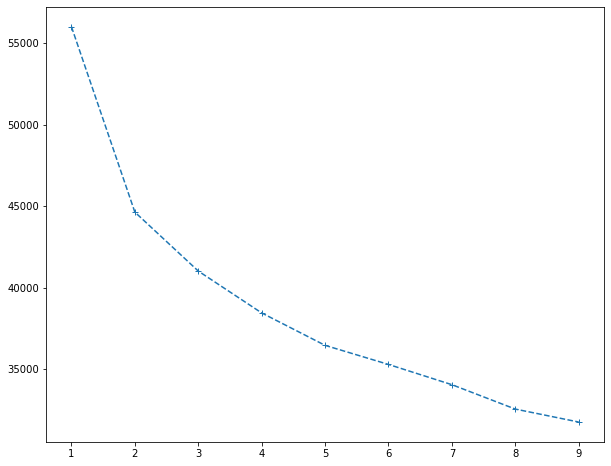

In [96]:
plt.figure(figsize=(10,8))
plt.plot(k_range,sme,'--+')
plt.show()

In [97]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=20,random_state=4)

In [98]:
km.fit(X)

KMeans(max_iter=20, n_clusters=2, random_state=4)

In [99]:
labels=km.labels_

In [100]:
labels

array([0, 0, 1, ..., 1, 0, 0])

In [101]:
df['Cluster']=labels

In [102]:
df

,Education,Marital_Status,income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,age,Cluster
0,2,2,84835.0,0,0,0,189,104,379,111,...,1,0,0,0,0,0,1,6,51,0
1,2,4,57091.0,0,0,0,464,5,64,7,...,5,0,0,0,0,1,1,1,60,0
2,2,3,67267.0,0,1,0,134,11,59,15,...,2,0,0,0,0,0,0,7,63,1
3,2,5,32474.0,1,1,0,10,0,1,0,...,7,0,0,0,0,0,0,0,54,1
4,2,4,21474.0,1,0,0,6,16,24,11,...,7,1,0,0,0,0,1,6,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4,2,66476.0,0,1,99,372,18,126,47,...,4,0,0,0,0,0,0,7,45,0
2236,0,3,31056.0,1,0,99,5,10,13,3,...,8,0,0,0,0,0,0,6,44,1
2237,2,2,46310.0,1,0,99,185,2,88,15,...,8,0,0,0,0,0,0,6,45,1
2238,2,3,65819.0,0,0,99,267,38,701,149,...,3,0,0,0,0,0,0,3,43,0


C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='age'>

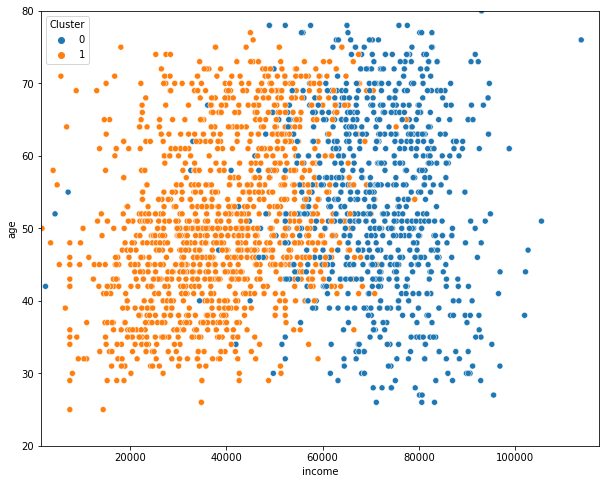

In [103]:
plt.figure(figsize=(10,8))
plt.xlim(1500,117416)
plt.ylim(20,80)
sns.scatterplot(df.income,df.age,hue=df.Cluster)

In [104]:
df[df['Cluster']==0]

,Education,Marital_Status,income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,age,Cluster
0,2,2,84835.0,0,0,0,189,104,379,111,...,1,0,0,0,0,0,1,6,51,0
1,2,4,57091.0,0,0,0,464,5,64,7,...,5,0,0,0,0,1,1,1,60,0
5,4,4,71691.0,0,0,0,336,130,411,240,...,2,0,0,0,0,0,1,6,63,0
6,0,3,63564.0,0,0,0,769,80,252,15,...,6,1,0,0,0,0,1,2,67,0
10,0,3,81044.0,0,0,0,450,26,535,73,...,1,0,0,0,0,0,0,7,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2,5,62568.0,0,1,99,362,17,398,80,...,4,0,0,0,1,0,0,6,59,0
2234,2,2,78901.0,0,1,99,321,11,309,33,...,4,0,0,0,0,0,0,7,48,0
2235,4,2,66476.0,0,1,99,372,18,126,47,...,4,0,0,0,0,0,0,7,45,0
2238,2,3,65819.0,0,0,99,267,38,701,149,...,3,0,0,0,0,0,0,3,43,0


In [105]:
from scipy.cluster import hierarchy as shc

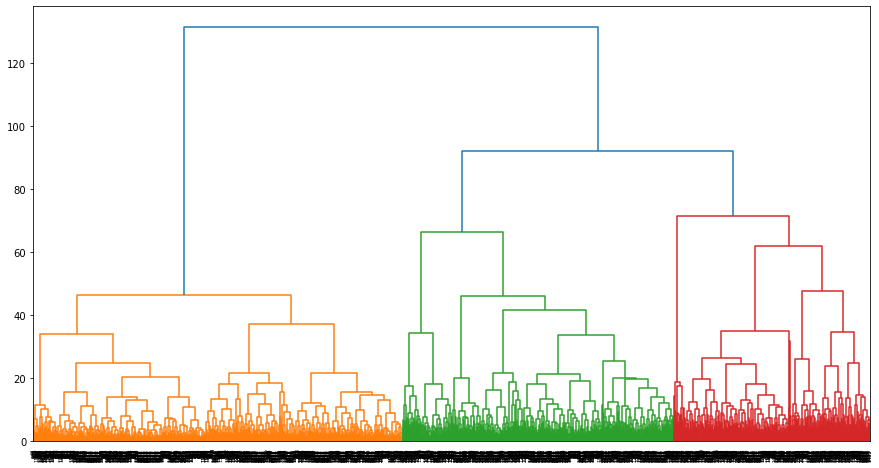

In [106]:
plt.figure(figsize=(15,8))
shc.dendrogram(shc.linkage(X,method='ward'))
plt.show()

In [117]:
from sklearn.cluster import AgglomerativeClustering

In [126]:
ac=AgglomerativeClustering(affinity='euclidean',linkage='ward')

In [127]:
ac.fit(X)

AgglomerativeClustering()

In [128]:
label=ac.labels_

In [129]:
label

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='age'>

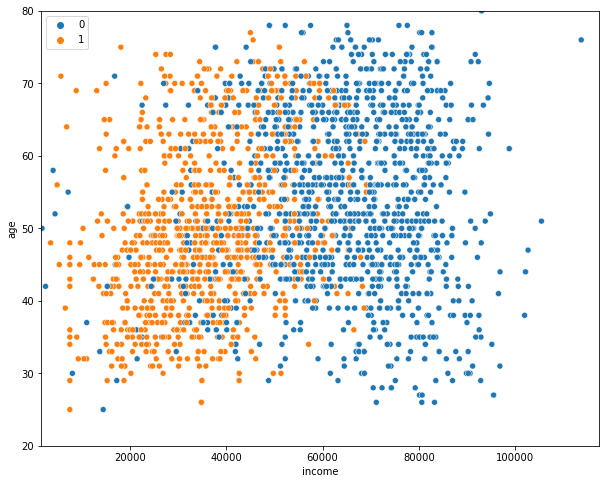

In [130]:
plt.figure(figsize=(10,8))
plt.xlim(1500,117416)
plt.ylim(20,80)
sns.scatterplot(df.income,df.age,hue=label)

In [134]:
from sklearn.cluster import DBSCAN
df

,Education,Marital_Status,income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,age,Cluster
0,2,2,84835.0,0,0,0,189,104,379,111,...,1,0,0,0,0,0,1,6,51,0
1,2,4,57091.0,0,0,0,464,5,64,7,...,5,0,0,0,0,1,1,1,60,0
2,2,3,67267.0,0,1,0,134,11,59,15,...,2,0,0,0,0,0,0,7,63,1
3,2,5,32474.0,1,1,0,10,0,1,0,...,7,0,0,0,0,0,0,0,54,1
4,2,4,21474.0,1,0,0,6,16,24,11,...,7,1,0,0,0,0,1,6,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4,2,66476.0,0,1,99,372,18,126,47,...,4,0,0,0,0,0,0,7,45,0
2236,0,3,31056.0,1,0,99,5,10,13,3,...,8,0,0,0,0,0,0,6,44,1
2237,2,2,46310.0,1,0,99,185,2,88,15,...,8,0,0,0,0,0,0,6,45,1
2238,2,3,65819.0,0,0,99,267,38,701,149,...,3,0,0,0,0,0,0,3,43,0
